EXP1-Perceptron learning Bipolar

In [ ]:
# def fnet(x):
#   if x < 0:
#     return -1
#   elif x > 0:
#     return 1
#   else:
#     return 0

# w1=0
# w2=0
# b=0
# c=1
# x1=[-1,-1,1,1]
# x2=[-1,1,-1,1]
# d=[-1,-1,-1,1]
# epochs = 10
def fnet(x):
  if x>=0:
    return 1
  else:
    return 0


w1=1
w2=0
b=-2
c=1
x1=[0,1,0,1]
x2=[0,0,1,1]
d=[0,1,1,1]
epochs=10
for epoch in range(epochs):
  print(f"Epoch {epoch}")
  error_count = 0
  for i in range(4):
    net = x1[i]*w1 + x2[i]*w2 + b
    O = fnet(net)
    e = d[i] - O
    delta_w1 = c*e*x1[i]
    delta_w2 = c*e*x2[i]
    delta_b = e
    w1+=delta_w1
    w2+=delta_w2
    b+=delta_b
    print(f"x1 = {x1[i]:2} | x2 = {x2[i]:2} | d = {d[i]:2} | net = {net:3} | y = {O:2} | e = {e:2} | " f"Δw1 = {delta_w1:2} | Δw2 = {delta_w2:2} | Δb = {delta_b:2} | w1 = {w1:2} | w2 = {w2:2} | b = {b:2}")
    if e != 0:
      error_count += 1

  if error_count == 0:
    print(f"Convergence met in Epoch {epoch}")
    break

Epoch 0
x1 =  0 | x2 =  0 | d =  0 | net =  -2 | y =  0 | e =  0 | Δw1 =  0 | Δw2 =  0 | Δb =  0 | w1 =  1 | w2 =  0 | b = -2
x1 =  1 | x2 =  0 | d =  1 | net =  -1 | y =  0 | e =  1 | Δw1 =  1 | Δw2 =  0 | Δb =  1 | w1 =  2 | w2 =  0 | b = -1
x1 =  0 | x2 =  1 | d =  1 | net =  -1 | y =  0 | e =  1 | Δw1 =  0 | Δw2 =  1 | Δb =  1 | w1 =  2 | w2 =  1 | b =  0
x1 =  1 | x2 =  1 | d =  1 | net =   3 | y =  1 | e =  0 | Δw1 =  0 | Δw2 =  0 | Δb =  0 | w1 =  2 | w2 =  1 | b =  0
Epoch 1
x1 =  0 | x2 =  0 | d =  0 | net =   0 | y =  1 | e = -1 | Δw1 =  0 | Δw2 =  0 | Δb = -1 | w1 =  2 | w2 =  1 | b = -1
x1 =  1 | x2 =  0 | d =  1 | net =   1 | y =  1 | e =  0 | Δw1 =  0 | Δw2 =  0 | Δb =  0 | w1 =  2 | w2 =  1 | b = -1
x1 =  0 | x2 =  1 | d =  1 | net =   0 | y =  1 | e =  0 | Δw1 =  0 | Δw2 =  0 | Δb =  0 | w1 =  2 | w2 =  1 | b = -1
x1 =  1 | x2 =  1 | d =  1 | net =   2 | y =  1 | e =  0 | Δw1 =  0 | Δw2 =  0 | Δb =  0 | w1 =  2 | w2 =  1 | b = -1
Epoch 2
x1 =  0 | x2 =  0 | d =  0 | net

# **EXP2 - Normal Sum Backpropagation**

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# Inputs and expected outputs
x = np.array([0.1, 0.5])
output = np.array([0.05, 0.95])
lr = 0.6  # learning rate

# Initial weights and biases
w1, w2 = 0.1, 0.2
w3, w4 = 0.3, 0.4
w5, w6 = 0.5, 0.6
w7, w8 = 0.7, 0.8

b1, b2 = 0.25, 0.25
b3, b4 = 0.35, 0.35

### --------- FORWARD PASS ---------
# Hidden Layer
net_h1 = x[0]*w1 + x[1]*w3 + b1
out_h1 = sigmoid(net_h1)

net_h2 = x[0]*w2 + x[1]*w4 + b2
out_h2 = sigmoid(net_h2)

# Output Layer
net_o1 = out_h1*w5 + out_h2*w6 + b3
out_o1 = sigmoid(net_o1)

net_o2 = out_h1*w7 + out_h2*w8 + b4
out_o2 = sigmoid(net_o2)

# Total Error
E_total = 0.5 * ((output[0] - out_o1)**2 + (output[1] - out_o2)**2)

print("=== Forward Pass ===")
print(f"Net h1: {net_h1}, Out h1: {out_h1}")
print(f"Net h2: {net_h2}, Out h2: {out_h2}")
print(f"Net o1: {net_o1}, Out o1: {out_o1}")
print(f"Net o2: {net_o2}, Out o2: {out_o2}")
print(f"Total Error: {E_total:.6f}")

### --------- BACKWARD PASS ---------
# Derivatives of error w.r.t. output
dE_o1 = out_o1 - output[0]
dE_o2 = out_o2 - output[1]

# Derivatives of output w.r.t. net input (sigmoid derivative)
d_out_o1 = sigmoid_derivative(out_o1)
d_out_o2 = sigmoid_derivative(out_o2)

# Gradients for output weights
dE_w5 = dE_o1 * d_out_o1 * out_h1
dE_w6 = dE_o1 * d_out_o1 * out_h2
dE_w7 = dE_o2 * d_out_o2 * out_h1
dE_w8 = dE_o2 * d_out_o2 * out_h2

# Update output weights
w5 -= lr * dE_w5
w6 -= lr * dE_w6
w7 -= lr * dE_w7
w8 -= lr * dE_w8

# Gradients for hidden neurons (backpropagated from both output neurons)
d_hidden1 = ((dE_o1 * d_out_o1 * w5) + (dE_o2 * d_out_o2 * w7)) * sigmoid_derivative(out_h1)
d_hidden2 = ((dE_o1 * d_out_o1 * w6) + (dE_o2 * d_out_o2 * w8)) * sigmoid_derivative(out_h2)

# Gradients for hidden weights
dE_w1 = d_hidden1 * x[0]
dE_w2 = d_hidden2 * x[0]
dE_w3 = d_hidden1 * x[1]
dE_w4 = d_hidden2 * x[1]

# Update hidden weights
w1 -= lr * dE_w1
w2 -= lr * dE_w2
w3 -= lr * dE_w3
w4 -= lr * dE_w4

print("\n=== Backward Pass ===")
print(f"Updated Output Weights: w5={w5:.4f}, w6={w6:.4f}, w7={w7:.4f}, w8={w8:.4f}")
print(f"Updated Hidden Weights: w1={w1:.4f}, w2={w2:.4f}, w3={w3:.4f}, w4={w4:.4f}")


=== Forward Pass ===
Net h1: 0.41000000000000003, Out h1: 0.6010878788483698
Net h2: 0.47000000000000003, Out h2: 0.6153837563911821
Net o1: 1.0197741932588942, Out o1: 0.7349286127170142
Net o2: 1.2630685203068044, Out o2: 0.7795538841677558
Total Error: 0.249090

=== Backward Pass ===
Updated Output Weights: w5=0.4519, w6=0.5507, w7=0.7106, w8=0.8108
Updated Hidden Weights: w1=0.0994, w2=0.1993, w3=0.2972, w4=0.3965


# **EXP-2 Backpropagation using XOR Gate**

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# XOR inputs and expected outputs
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Learning parameters
epochs = 10000
lr = 0.5
display_step = 1000

# Initialize weights and biases randomly
np.random.seed(42)
# Hidden layer: 2 inputs -> 2 neurons
w_hidden = np.random.rand(2, 2)
b_hidden = np.random.rand(1, 2)
# Output layer: 2 hidden neurons -> 1 output
w_output = np.random.rand(2, 1)
b_output = np.random.rand(1, 1)

print("Initial weights and biases:")
print(f"Hidden weights:\n{w_hidden}")
print(f"Hidden bias:\n{b_hidden}")
print(f"Output weights:\n{w_output}")
print(f"Output bias:\n{b_output}")
print("\nTraining the XOR neural network:")

# Training
for i in range(epochs):
    # Forward Pass
    # Hidden layer
    hidden_layer_input = np.dot(x, w_hidden) + b_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Output layer
    output_layer_input = np.dot(hidden_layer_output, w_output) + b_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - predicted_output

    if (i % display_step == 0):
        loss = np.mean(np.square(error))
        print(f"Epoch {i}: Loss = {loss:.6f}")

    # Backward Pass
    # Output layer
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    # Hidden layer
    error_hidden_layer = d_predicted_output.dot(w_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    # Output layer
    w_output += hidden_layer_output.T.dot(d_predicted_output) * lr
    b_output += np.sum(d_predicted_output, axis=0, keepdims=True) * lr

    # Hidden layer
    w_hidden += x.T.dot(d_hidden_layer) * lr
    b_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

print("\nTraining Complete!")
print(f"Final weights and biases:")
print(f"Hidden weights:\n{w_hidden}")
print(f"Hidden bias:\n{b_hidden}")
print(f"Output weights:\n{w_output}")
print(f"Output bias:\n{b_output}")

# Testing
print("\nPredictions after training:")
hidden_layer_output = sigmoid(np.dot(x, w_hidden) + b_hidden)
predicted_output = sigmoid(np.dot(hidden_layer_output, w_output) + b_output)

for i in range(len(x)):
    print(f"Input: {x[i]} -> Predicted: {predicted_output[i][0]:.4f} | Expected: {y[i][0]}")

# Visualization of decision making
def make_prediction(input_data):
    hidden = sigmoid(np.dot(input_data, w_hidden) + b_hidden)
    output = sigmoid(np.dot(hidden, w_output) + b_output)
    return output[0][0]

print("\nDetailed forward pass for input [0, 1]:")
test_input = np.array([[0, 1]])
hidden_test = sigmoid(np.dot(test_input, w_hidden) + b_hidden)
output_test = sigmoid(np.dot(hidden_test, w_output) + b_output)

print(f"Hidden layer activations: {hidden_test[0]}")
print(f"Final output: {output_test[0][0]:.4f}")

Initial weights and biases:
Hidden weights:
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]
Hidden bias:
[[0.15601864 0.15599452]]
Output weights:
[[0.05808361]
 [0.86617615]]
Output bias:
[[0.60111501]]

Training the XOR neural network:
Epoch 0: Loss = 0.324659
Epoch 1000: Loss = 0.012572
Epoch 2000: Loss = 0.002546
Epoch 3000: Loss = 0.001345
Epoch 4000: Loss = 0.000902
Epoch 5000: Loss = 0.000675
Epoch 6000: Loss = 0.000537
Epoch 7000: Loss = 0.000446
Epoch 8000: Loss = 0.000380
Epoch 9000: Loss = 0.000331

Training Complete!
Final weights and biases:
Hidden weights:
[[4.59244504 6.47246975]
 [4.5971031  6.49153682]]
Hidden bias:
[[-7.05239171 -2.8842842 ]]
Output weights:
[[-10.32676834]
 [  9.62121009]]
Output bias:
[[-4.44969307]]

Predictions after training:
Input: [0 0] -> Predicted: 0.0189 | Expected: 0
Input: [0 1] -> Predicted: 0.9837 | Expected: 1
Input: [1 0] -> Predicted: 0.9837 | Expected: 1
Input: [1 1] -> Predicted: 0.0169 | Expected: 0

Detailed forward pass for in

EXP3-Image CNN hardcoded

Saving sample.jpg to sample.jpg


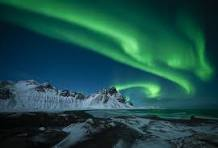

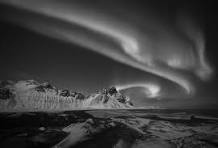

1.0


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from google.colab import files
import random
uploaded = files.upload()
filename = next(iter(uploaded))
image = cv2.imread(filename)


cv2_imshow(image)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


import numpy as np
def convolution(image,filter,padding=0,stride=1):
  img_h,img_w=image.shape
  filt_h,filt_w=filter.shape

  if padding>0:
    image=np.pad(image,((padding,padding),(padding,padding)), mode='constant',constant_values=0)
  out_h=(image.shape[0]-filt_h)//stride+1
  out_w=(image.shape[1]-filt_w)//stride+1
  result=np.zeros((out_h,out_w))

  for i in range(out_h):
    for j in range(out_w):
      patch=image[i*stride:i*stride+filt_h,j*stride:j*stride+filt_w]
      value=np.sum(patch*filter)
      result[i,j]=max(0,value)
  return result

def pooling(image,pool_size=2,stride=1):
  img_h,img_w=image.shape
  out_h=((img_h-pool_size))//stride+1
  out_w=((img_w-pool_size))//stride+1
  result=np.zeros((out_h,out_w))

  for i in range(out_h):
    for j in range(out_w):
      patch=image[i*stride:i*stride+pool_size,j*stride:j*stride+pool_size]
      result[i,j]=np.max(patch)
  return result

conv_img=convolution(gray,np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]))

pool_img=pooling(conv_img)

flattend=pool_img.flatten()
weight=np.random.rand(flattend.shape[0])
net=np.dot(flattend,weight)
out=1/(1+np.exp(-net))
print(out)

EXP3-CNN DATASET MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8893 - loss: 0.3662 - val_accuracy: 0.9843 - val_loss: 0.0469
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9861 - val_loss: 0.0400
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9896 - loss: 0.0334 - val_accuracy: 0.9901 - val_loss: 0.0294
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9907 - val_loss: 0.0296
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9915 - val_loss: 0.0273
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0365
Test Accuracy: 0.9915


EXP4-sentiment

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'text': [
        "I love this movie",
        "This is a bad product",
        "Awesome experience",
        "Worst thing I ever bought",
        "I am very happy today",
        "I hate this so much",
        "What a great day!",
        "Terrible and boring",
        "Amazing and fantastic!",
        "Disgusting and awful"
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
})

texts=data['text'].tolist()
lables=data['label'].tolist()

max_words=1000
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)

max_len=10
padded=pad_sequences(sequences,maxlen=max_len)

X_train,X_test,y_train,y_test=train_test_split(padded,lables,random_state=42,test_size=0.2)
X_train=np.array(X_train,dtype='int32')
X_test=np.array(X_test,dtype='int32')
y_train=np.array(y_train)
y_test=np.array(y_test)

model=Sequential()
model.add(Embedding(input_dim=max_words,output_dim=64,input_length=max_len))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=2,epochs=10,validation_data=(X_test,y_test))

def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_len)
    prediction = model.predict(padded_seq)[0][0]
    if prediction > 0.5:
        print(f"'{text}' ➝ Positive ({prediction:.2f})")
    else:
        print(f"'{text}' ➝ Negative ({prediction:.2f})")
print("\n--- Predictions ---")
predict_sentiment("I really enjoyed this")
predict_sentiment("This is terrible and awful")
predict_sentiment("I absolutely loved it")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6333 - loss: 0.6927 - val_accuracy: 1.0000 - val_loss: 0.6518
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8667 - loss: 0.6365 - val_accuracy: 0.5000 - val_loss: 0.6656
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8667 - loss: 0.5761 - val_accuracy: 0.5000 - val_loss: 0.6789
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.5186 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.4949 - val_accuracy: 0.5000 - val_loss: 0.7118
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.4017 - val_accuracy: 0.5000 - val_loss: 0.7299
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.3886 - val_accuracy: 0.5000 - val_loss: 0.7517
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.3045 - val_accuracy: 0.5000 - val_loss: 0.7800
Epoch 9/10


EXP4-rnn MNIST dataset

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6628 - loss: 1.0317 - val_accuracy: 0.8991 - val_loss: 0.3507
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9110 - loss: 0.3094 - val_accuracy: 0.9294 - val_loss: 0.2434
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9313 - loss: 0.2409 - val_accuracy: 0.9473 - val_loss: 0.1972
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9409 - loss: 0.2062 - val_accuracy: 0.9377 - val_loss: 0.2239
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9438 - loss: 0.1935 - val_accuracy: 0.9468 - val_loss: 0.1829
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.2019
Test Accuracy: 0.95
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


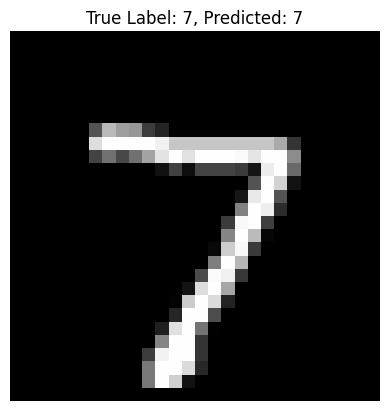

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot encode labels (e.g., 3 → [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. RNN Model
model = Sequential([
    SimpleRNN(64, input_shape=(28, 28), activation='tanh'),
    Dense(10, activation='softmax')  # 10 output classes (0-9)
])

# 5. Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# 7. Evaluate
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

# 8. Predict a sample
sample = np.expand_dims(x_test[0], axis=0)  # Shape: (1, 28, 28)
prediction = model.predict(sample)
predicted_digit = np.argmax(prediction)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[0])}, Predicted: {predicted_digit}")
plt.axis('off')
plt.show()

EXP5-SOM

In [ ]:
import numpy as np

X = np.array([[0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1]])
weights = np.array([[0.2, 0.9], [0.4, 0.7], [0.6, 0.5], [0.8, 0.3]])
learning_rate = 0.5
epochs = 100
for epoch in range(epochs):
  print(f"Iteration {epoch+1}")
  prev_weight = weights.copy()
  for x in X:
    distance = [np.linalg.norm(x - weights[: , j]) for j in range(2)]
    winning = np.argmin(distance)

    weights[: , winning] += learning_rate*(x - weights[: , winning])
  learning_rate *= 0.5
  print(weights)
  if np.array_equal(weights,prev_weight):
    print(f"Convergence met in Iteration {epoch+1}")
    break

Iteration 1
[[0.025 0.95 ]
 [0.3   0.35 ]
 [0.45  0.25 ]
 [0.725 0.15 ]]
Iteration 2
[[0.01054688 0.9625    ]
 [0.3140625  0.2625    ]
 [0.51796875 0.1875    ]
 [0.69648438 0.1125    ]]
Iteration 3
[[0.00706558 0.9671875 ]
 [0.31977234 0.2296875 ]
 [0.55207672 0.1640625 ]
 [0.68729324 0.0984375 ]]
Iteration 4
[[0.00582186 0.96923828]
 [0.32207804 0.21533203]
 [0.56842259 0.15380859]
 [0.68374382 0.09228516]]
Iteration 5
[[0.00529294 0.97019958]
 [0.32309042 0.20860291]
 [0.57638176 0.14900208]
 [0.68220252 0.08940125]]
Iteration 6
[[0.00504869 0.97066522]
 [0.32356182 0.20534348]
 [0.58030521 0.14667392]
 [0.68148687 0.08800435]]
Iteration 7
[[0.00493128 0.97089439]
 [0.3237889  0.20373924]
 [0.58225266 0.14552803]
 [0.68114239 0.08731682]]
Iteration 8
[[0.00487372 0.97100809]
 [0.32390029 0.20294338]
 [0.58322279 0.14495956]
 [0.68097343 0.08697574]]
Iteration 9
[[0.00484522 0.97106471]
 [0.32395545 0.20254701]
 [0.58370695 0.14467643]
 [0.68088977 0.08680586]]
Iteration 10
[[0.004831

EXP6- Make Moon Shape PCA

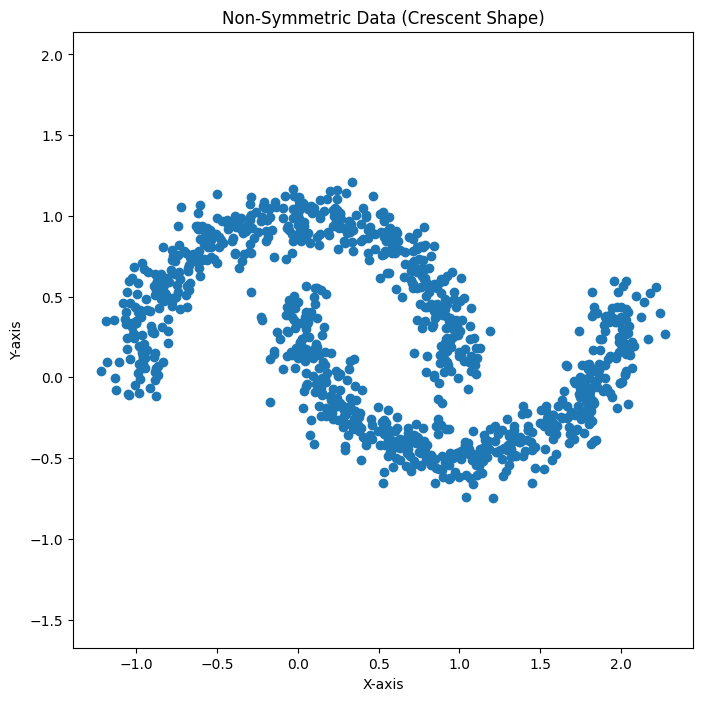

Mean Squared Error for PCA & Inverse PCA is  1.4792065065097786e-32
Mean Squared Error for Autoencoder is  0.036742105060636694


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

n_samples = 1000
noise = 0.1
dataset, labels = make_moons(n_samples=n_samples, noise=noise, random_state=42)

plt.figure(figsize=(8, 8))
plt.scatter(dataset[:, 0], dataset[:, 1])

plt.title("Non-Symmetric Data (Crescent Shape)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset)

inverse_transformed_data = pca.inverse_transform(principal_components)

mse = mean_squared_error(dataset, inverse_transformed_data)
print("Mean Squared Error for PCA & Inverse PCA is ", mse)

import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

autoencoder = MLPRegressor(hidden_layer_sizes=(2024, 2, 2024), activation='relu', solver='adam', max_iter=100000000)

autoencoder.fit(dataset, dataset)

reconstructed_data = autoencoder.predict(dataset)

mse = mean_squared_error(dataset, reconstructed_data)

print("Mean Squared Error for Autoencoder is ", mse)

EXP6- Make Circle Shape PCA

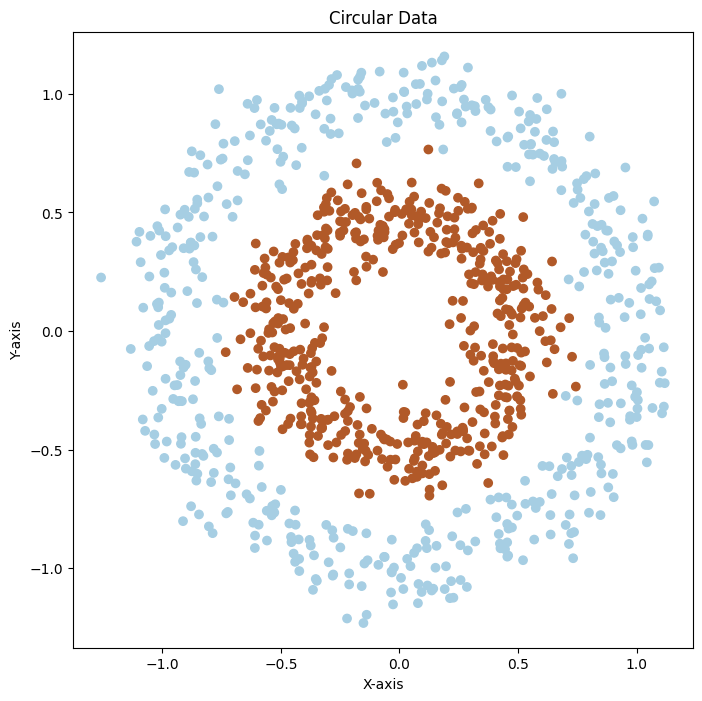

Mean Squared Error for PCA & Inverse PCA is  4.7182429654752917e-32
Mean Squared Error for Autoencoder is  3.76469684581078e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Generate a circular dataset
n_samples = 1000
noise = 0.1
dataset, labels = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)

# Visualize the circular data
plt.figure(figsize=(8, 8))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap=plt.cm.Paired)
plt.title("Circular Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

# PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset)

# Inverse transform the data
inverse_transformed_data = pca.inverse_transform(principal_components)

# Calculate Mean Squared Error for PCA and Inverse PCA
mse_pca = mean_squared_error(dataset, inverse_transformed_data)
print("Mean Squared Error for PCA & Inverse PCA is ", mse_pca)

# Autoencoder using MLPRegressor
autoencoder = MLPRegressor(hidden_layer_sizes=(2024, 2, 2024), activation='relu', solver='adam', max_iter=100000000)

autoencoder.fit(dataset, dataset)

# Reconstructed data
reconstructed_data = autoencoder.predict(dataset)

# Mean Squared Error for Autoencoder
mse_autoencoder = mean_squared_error(dataset, reconstructed_data)

print("Mean Squared Error for Autoencoder is ", mse_autoencoder)


EXP6-Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

iris = load_iris()
dataset1 = StandardScaler().fit_transform(iris.data)
pca=PCA(n_components=2)
principal_components=pca.fit_transform(dataset1)
inverse_transform_data=pca.inverse_transform(principal_components)
mse=mean_squared_error(dataset1,inverse_transform_data)
print("Mean Squared Error for PCA & Inverse PCA is ",mse)

from sklearn.neural_network import MLPRegressor
autoencoder=MLPRegressor(hidden_layer_sizes=(2024,2,2024),activation='relu',solver='adam',max_iter=10000000)
autoencoder.fit(dataset1,dataset1)
reconstructed_data=autoencoder.predict(dataset1)
mse_auto=mean_squared_error(dataset1,reconstructed_data)
print("auto mse",mse_auto)

Mean Squared Error for PCA & Inverse PCA is  0.04186792799998359
auto mse 0.03960151567775858


EXP6-MNIST

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, _), _ = mnist.load_data()
X_data = X_train[:10000]  # reduce if memory issue

# Flatten and normalize
X_flat = X_data.reshape((X_data.shape[0], -1)) / 255.0
X_scaled = StandardScaler().fit_transform(X_flat)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
inverse_transform_data = pca.inverse_transform(principal_components)
mse_pca = mean_squared_error(X_scaled, inverse_transform_data)
print("Mean Squared Error for PCA & Inverse PCA is", mse_pca)
autoencoder = MLPRegressor(hidden_layer_sizes=(784, 2, 784),activation='relu',solver='adam',max_iter=10)
autoencoder.fit(X_scaled, X_scaled)
reconstructed_data = autoencoder.predict(X_scaled)
mse_auto = mean_squared_error(X_scaled, reconstructed_data)
print("Mean Squared Error for Autoencoder is", mse_auto)

Mean Squared Error for PCA & Inverse PCA is 0.7680251055173775


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error for Autoencoder is 0.6780724455380532


# **EXP 7-MNIST**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1, Loss: 216.6796
Epoch 2, Loss: 217.6149
Epoch 3, Loss: 207.2700
Epoch 4, Loss: 189.8443
Epoch 5, Loss: 192.5717
Epoch 6, Loss: 176.6881
Epoch 7, Loss: 162.8278
Epoch 8, Loss: 173.7600
Epoch 9, Loss: 170.5772
Epoch 10, Loss: 168.1542


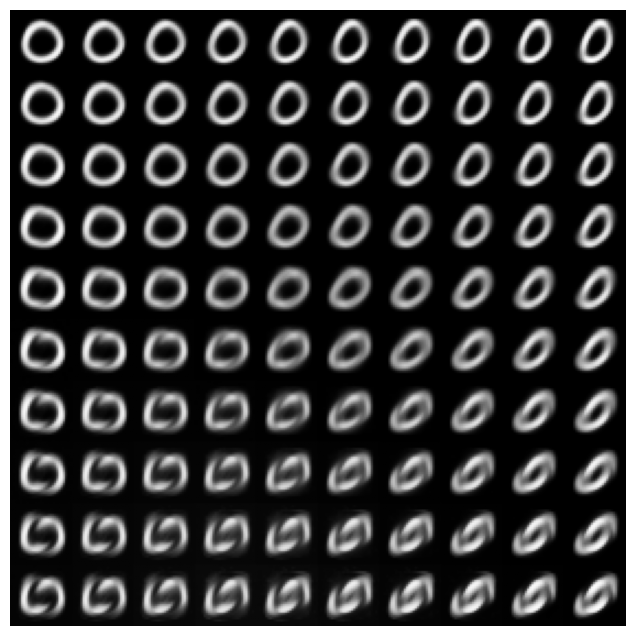

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST and filter only digit "0"
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train[y_train == 0]
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)

# Architecture parameters
input_dim, hidden_dim, latent_dim = 784, 128, 2

# Encoder weights
W1 = tf.Variable(tf.random.normal([input_dim, hidden_dim], stddev=0.01))
b1 = tf.Variable(tf.zeros([hidden_dim]))
W_mu = tf.Variable(tf.random.normal([hidden_dim, latent_dim], stddev=0.01))
b_mu = tf.Variable(tf.zeros([latent_dim]))
W_logvar = tf.Variable(tf.random.normal([hidden_dim, latent_dim], stddev=0.01))
b_logvar = tf.Variable(tf.zeros([latent_dim]))

# Decoder weights
W2 = tf.Variable(tf.random.normal([latent_dim, hidden_dim], stddev=0.01))
b2 = tf.Variable(tf.zeros([hidden_dim]))
W_out = tf.Variable(tf.random.normal([hidden_dim, input_dim], stddev=0.01))
b_out = tf.Variable(tf.zeros([input_dim]))

# Sampling using reparameterization
def sample(mu, log_var):
    eps = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * log_var) * eps

# Forward pass
def forward(x):
    h = tf.nn.relu(tf.matmul(x, W1) + b1)
    mu = tf.matmul(h, W_mu) + b_mu
    log_var = tf.matmul(h, W_logvar) + b_logvar
    z = sample(mu, log_var)
    h_dec = tf.nn.relu(tf.matmul(z, W2) + b2)
    x_recon = tf.nn.sigmoid(tf.matmul(h_dec, W_out) + b_out)
    return x_recon, mu, log_var

# Loss
def vae_loss(x):
    x_recon, mu, log_var = forward(x)
    recon = -tf.reduce_sum(x * tf.math.log(x_recon + 1e-10) + (1 - x) * tf.math.log(1 - x_recon + 1e-10), axis=1)
    kl = -0.5 * tf.reduce_sum(1 + log_var - tf.square(mu) - tf.exp(log_var), axis=1)
    return tf.reduce_mean(recon + kl)

# Training loop
optimizer = tf.optimizers.Adam(1e-3)
batch_size, epochs = 64, 10
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000).batch(batch_size)

for epoch in range(epochs):
    for batch in dataset:
        with tf.GradientTape() as tape:
            loss = vae_loss(batch)
        vars = [W1, b1, W_mu, b_mu, W_logvar, b_logvar, W2, b2, W_out, b_out]
        grads = tape.gradient(loss, vars)
        optimizer.apply_gradients(zip(grads, vars))
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

# Generate samples
def generate():
    grid = 10
    image = np.zeros((28*grid, 28*grid))
    for i, yi in enumerate(np.linspace(-2, 2, grid)):
        for j, xi in enumerate(np.linspace(-2, 2, grid)):
            z = np.array([[xi, yi]], dtype=np.float32)
            h = tf.nn.relu(tf.matmul(z, W2) + b2)
            x_dec = tf.nn.sigmoid(tf.matmul(h, W_out) + b_out)
            digit = x_dec.numpy().reshape(28, 28)
            image[i*28:(i+1)*28, j*28:(j+1)*28] = digit
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

generate()


# **EXP 8-MNIST**

Epoch 1/20, Gen Loss: 1.7405, Disc Loss: 0.5867
Epoch 2/20, Gen Loss: 2.0307, Disc Loss: 0.5631
Epoch 3/20, Gen Loss: 1.6089, Disc Loss: 0.9151
Epoch 4/20, Gen Loss: 1.3044, Disc Loss: 0.8790
Epoch 5/20, Gen Loss: 1.1799, Disc Loss: 1.0335
Epoch 6/20, Gen Loss: 1.1659, Disc Loss: 1.1634
Epoch 7/20, Gen Loss: 1.0119, Disc Loss: 1.1949
Epoch 8/20, Gen Loss: 1.1216, Disc Loss: 1.2126
Epoch 9/20, Gen Loss: 0.9991, Disc Loss: 1.2436
Epoch 10/20, Gen Loss: 0.8381, Disc Loss: 1.3899
Epoch 11/20, Gen Loss: 0.8703, Disc Loss: 1.4491
Epoch 12/20, Gen Loss: 0.8515, Disc Loss: 1.4873
Epoch 13/20, Gen Loss: 0.8898, Disc Loss: 1.3652
Epoch 14/20, Gen Loss: 0.8056, Disc Loss: 1.3304
Epoch 15/20, Gen Loss: 0.8182, Disc Loss: 1.3727
Epoch 16/20, Gen Loss: 0.9018, Disc Loss: 1.2985
Epoch 17/20, Gen Loss: 0.7942, Disc Loss: 1.5581
Epoch 18/20, Gen Loss: 0.8296, Disc Loss: 1.3084
Epoch 19/20, Gen Loss: 0.7938, Disc Loss: 1.3835
Epoch 20/20, Gen Loss: 0.8581, Disc Loss: 1.3160


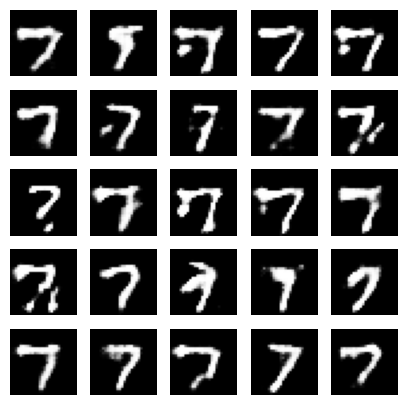

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess MNIST data (only digit 7)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train[y_train == 7] / 255.0  # Normalize to [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1)
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(6000).batch(100)

# GAN parameters
latent_dim = 100
epochs = 20
batch_size = 100

# Build generator
generator = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(latent_dim,)),
    tf.keras.layers.Dense(7*7*256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.Reshape((7, 7, 256)),
    tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')
])

# Build discriminator
discriminator = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Loss functions
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, latent_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))
    return gen_loss, disc_loss

# Training loop
for epoch in range(epochs):
    for image_batch in train_dataset:
        gen_loss, disc_loss = train_step(image_batch)
    print(f'Epoch {epoch+1}/{epochs}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}')

# Final visualization
noise = tf.random.normal([25, latent_dim])
generated_images = generator(noise, training=False)
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generator network: MLP with one hidden layer
def generator(z, weights_g1, bias_g1, weights_g2, bias_g2):
    # z: (batch_size, latent_dim), weights_g1: (latent_dim, hidden_dim), weights_g2: (hidden_dim, data_dim)
    hidden = np.dot(z, weights_g1) + bias_g1  # (batch_size, hidden_dim)
    hidden = sigmoid(hidden)  # Activation
    output = np.dot(hidden, weights_g2) + bias_g2  # (batch_size, data_dim)
    return sigmoid(output)  # Output in range [0, 1]

# Discriminator network: MLP with one hidden layer
def discriminator(x, weights_d1, bias_d1, weights_d2, bias_d2):
    # x: (batch_size, data_dim), weights_d1: (data_dim, hidden_dim), weights_d2: (hidden_dim, 1)
    hidden = np.dot(x, weights_d1) + bias_d1  # (batch_size, hidden_dim)
    hidden = sigmoid(hidden)  # Activation
    output = np.dot(hidden, weights_d2) + bias_d2  # (batch_size, 1)
    return output  # Raw logits

# Load and preprocess MNIST data (only digit 7)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train[y_train == 7] / 255.0  # Normalize to [0, 1]
x_train = x_train.reshape(-1, 28 * 28)  # Flatten to (num_examples, 784)
num_examples = x_train.shape[0]

# Hyperparameters
epochs = 10000
learning_rate = 0.01
batch_size = 32
latent_dim = 100
data_dim = 28 * 28  # 784 for MNIST
hidden_dim = 256  # Hidden layer size for both generator and discriminator
eps = 1e-8  # For numerical stability in log

# Initialize weights and biases
weights_g1 = np.random.normal(size=(latent_dim, hidden_dim))  # (100, 256)
bias_g1 = np.zeros((hidden_dim,))
weights_g2 = np.random.normal(size=(hidden_dim, data_dim))  # (256, 784)
bias_g2 = np.zeros((data_dim,))
weights_d1 = np.random.normal(size=(data_dim, hidden_dim))  # (784, 256)
bias_d1 = np.zeros((hidden_dim,))
weights_d2 = np.random.normal(size=(hidden_dim, 1))  # (256, 1)
bias_d2 = np.zeros((1,))

# Training loop
for epoch in range(epochs):
    # Sample real data
    idx = np.random.randint(0, num_examples, batch_size)
    real_batch = x_train[idx]  # (32, 784)

    # Generate fake data
    z = np.random.normal(size=(batch_size, latent_dim))  # (32, 100)
    fake_data = generator(z, weights_g1, bias_g1, weights_g2, bias_g2)  # (32, 784)

    # Discriminator outputs
    d_real = discriminator(real_batch, weights_d1, bias_d1, weights_d2, bias_d2)  # (32, 1)
    d_fake = discriminator(fake_data, weights_d1, bias_d1, weights_d2, bias_d2)  # (32, 1)

    # Apply sigmoid
    sig_d_real = sigmoid(d_real)
    sig_d_fake = sigmoid(d_fake)

    # Discriminator loss (with stability clipping)
    d_loss_real = -np.mean(np.log(np.clip(sig_d_real, eps, 1 - eps)))
    d_loss_fake = -np.mean(np.log(np.clip(1 - sig_d_fake, eps, 1 - eps)))
    d_loss = d_loss_real + d_loss_fake

    # Gradients for discriminator
    # Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
    grad_d2_real = (sig_d_real - 1)  # (32, 1)
    grad_d2_fake = sig_d_fake  # (32, 1)
    hidden_d = sigmoid(np.dot(real_batch, weights_d1) + bias_d1)  # (32, 256)
    grad_d1_real = np.dot(real_batch.T, grad_d2_real * hidden_d * (1 - hidden_d)) / batch_size  # (784, 256)
    grad_d2_real = np.sum(grad_d2_real * hidden_d, axis=0) / batch_size  # (256,)
    hidden_d_fake = sigmoid(np.dot(fake_data, weights_d1) + bias_d1)  # (32, 256)
    grad_d1_fake = np.dot(fake_data.T, grad_d2_fake * hidden_d_fake * (1 - hidden_d_fake)) / batch_size  # (784, 256)
    grad_d2_fake = np.sum(grad_d2_fake * hidden_d_fake, axis=0) / batch_size  # (256,)
    d_weights_d1 = grad_d1_real + grad_d1_fake  # (784, 256)
    d_weights_d2 = (grad_d2_real + grad_d2_fake).reshape(hidden_dim, 1)  # (256, 1)
    d_bias_d1 = np.sum(grad_d2_real * hidden_d * (1 - hidden_d) + grad_d2_fake * hidden_d_fake * (1 - hidden_d_fake), axis=0) / batch_size  # (256,)
    d_bias_d2 = np.sum(grad_d2_real + grad_d2_fake) / batch_size  # Scalar

    # Update discriminator weights
    weights_d1 -= learning_rate * d_weights_d1
    weights_d2 -= learning_rate * d_weights_d2
    bias_d1 -= learning_rate * d_bias_d1
    bias_d2 -= learning_rate * d_bias_d2

    # Generator loss
    g_loss = -np.mean(np.log(np.clip(sig_d_fake, eps, 1 - eps)))

    # Gradients for generator
    grad_g2 = sig_d_fake  # (32, 1)
    hidden_g = sigmoid(np.dot(z, weights_g1) + bias_g1)  # (32, 256)
    grad_g2 = np.dot(hidden_g.T, grad_g2) / batch_size  # (256, 784)
    grad_g1 = np.dot(z.T, np.dot(grad_g2, weights_g2.T) * hidden_g * (1 - hidden_g)) / batch_size  # (100, 256)
    grad_b2 = np.sum(grad_g2, axis=0) / batch_size  # (784,)
    grad_b1 = np.sum(np.dot(grad_g2, weights_g2.T) * hidden_g * (1 - hidden_g), axis=0) / batch_size  # (256,)

    # Update generator weights
    weights_g1 -= learning_rate * grad_g1
    weights_g2 -= learning_rate * grad_g2
    bias_g1 -= learning_rate * grad_b1
    bias_g2 -= learning_rate * grad_b2

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss:.4f}, g_loss: {g_loss:.4f}")

# Generate and visualize final samples
z = np.random.normal(size=(25, latent_dim))  # (25, 100)
generated_images = generator(z, weights_g1, bias_g1, weights_g2, bias_g2)  # (25, 784)
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 0, D Loss: 2.1842, G Loss: 0.7401
Epoch 1000, D Loss: 0.3711, G Loss: 5.6120
Epoch 2000, D Loss: 0.3938, G Loss: 4.9510
Epoch 3000, D Loss: 0.4160, G Loss: 4.5304
Epoch 4000, D Loss: 0.4516, G Loss: 4.1946
Epoch 5000, D Loss: 0.4883, G Loss: 3.9072
Epoch 6000, D Loss: 0.5207, G Loss: 3.6950
Epoch 7000, D Loss: 0.5471, G Loss: 3.5499
Epoch 8000, D Loss: 0.5714, G Loss: 3.4191
Epoch 9000, D Loss: 0.5928, G Loss: 3.3181


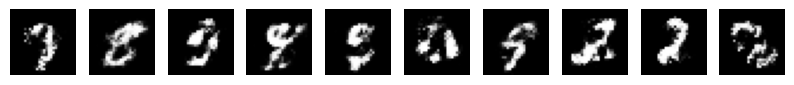

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load data
(x_train, _), _ = mnist.load_data()
x_train = x_train.astype("float32") / 255.0

# Generator
generator = Sequential([
    Dense(128, input_dim=100),
    LeakyReLU(0.2),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

# Discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GAN model
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    # Select random real images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise, verbose=0)

    # Train discriminator
    discriminator.trainable = True
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)) * 0.9)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))

    # Train generator via GAN
    noise = np.random.normal(0, 1, (batch_size, 100))
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print losses occasionally
    if epoch % 1000 == 0:
        d_loss_total = d_loss_real[0] + d_loss_fake[0]
        print(f"Epoch {epoch}, D Loss: {d_loss_total:.4f}, G Loss: {g_loss:.4f}")

# Generate and visualize final images
noise = np.random.normal(0, 1, (10, 100))
generated_imgs = generator.predict(noise, verbose=0)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(generated_imgs[i], cmap='gray')
    plt.axis('off')
plt.show()